In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

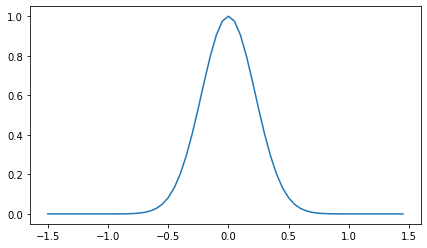

In [2]:
import numpy as np

def kernel(xi, xj, beta=1):
    return np.exp(- beta * np.sum((xi - xj)**2))

X = np.arange(-1.5, 1.5, 0.05)
Y = np.zeros(len(X))
for i in range(len(X)):
    Y[i] = kernel(X[i], 0, 10)

plt.figure(figsize=(7, 4))
plt.plot(X, Y)
plt.show()

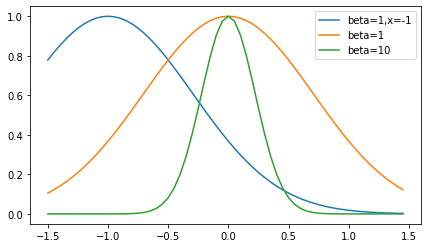

In [24]:
import numpy as np

def kernel(xi, xj, beta=1):
    return np.exp(- beta * np.sum((xi - xj)**2))

X = np.arange(-1.5, 1.5, 0.05)
Y = np.zeros(len(X))
for i in range(len(X)):
    Y[i] = kernel(X[i], 0, 10)
    
X1 = np.arange(-1.5, 1.5, 0.05)
Y1 = np.zeros(len(X1))
for i in range(len(X1)):
    Y1[i] = kernel(X[i], 0, 1)
    
X2 = np.arange(-1.5, 1.5, 0.05)
Y2 = np.zeros(len(X2))
for i in range(len(X2)):
    Y2[i] = kernel(X[i], -1, 1)


plt.figure(figsize=(7, 4))
plt.plot(X2, Y2,label='beta=1,x=-1')
plt.plot(X1, Y1,label='beta=1')
plt.plot(X, Y,label='beta=10')
plt.legend()
plt.show()

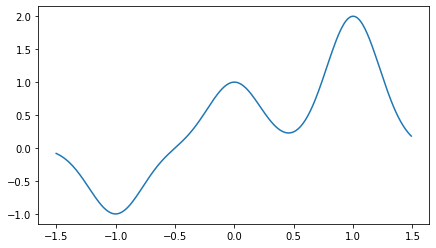

In [25]:
def kernel(xi, xj, beta=1):
    return np.exp(- beta * np.sum((xi - xj)**2))

X = np.arange(-1.5, 1.5, 0.01)
Y = np.zeros(len(X))

centers = [0,-1,1]
weights = [1,-1,2]
for i in range(len(X)):
    for weight, center in zip(weights, centers):
        Y[i] += weight * kernel(X[i], center, 10)

plt.figure(figsize=(7, 4))
plt.plot(X, Y)
plt.show()

In [21]:
Y[200]

0.24625499570250808

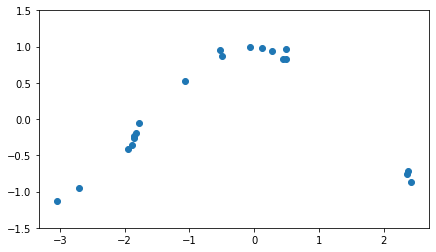

In [28]:
import pandas as pd

def wave_dataset(size, xlim=[0, 2], scale=None):
    x = np.random.uniform(xlim[0], xlim[1], size)
    y = np.cos(x)
    if scale is not None:
        noize = np.random.normal(0, scale, size)
        y = y + noize
    df = pd.DataFrame()
    df['x'] = x
    df['y'] = y
    return df

data = wave_dataset(20, xlim=[-3.14, 3.14], scale=0.05)

plt.figure(figsize=(7, 4))
plt.scatter(data['x'].values, data['y'].values)
plt.ylim((-1.5, 1.5))
plt.show()

In [29]:
from itertools import combinations_with_replacement

X = data['x'].values
Y = data['y'].values

# ハイパーパラメータ
beta = 1

# データ数
N = X.shape[0]

# グラム行列の計算
K = np.zeros((N, N))
for i, j in combinations_with_replacement(range(N), 2):
    K[i][j] = kernel(X[i], X[j])
    K[j][i] = K[i][j]

In [7]:
range(N)

range(0, 20)

In [30]:
# 重みを計算
alpha = np.linalg.inv(K).dot(Y)

In [34]:
alpha

array([ 6.02322584e+14,  1.17025783e+11, -2.11738555e+09,  6.54838657e+13,
       -1.12908338e+14,  5.07481917e+11, -1.96968340e+11,  1.06341727e+07,
       -1.27304320e+12,  1.81400868e+11, -1.87014454e+12, -1.41188949e+13,
        1.52078094e+09, -3.24674132e+11,  6.01491518e+08, -7.73990353e+09,
       -5.64069907e+14,  1.57089710e+13, -5.87760972e+07,  1.04484247e+13])

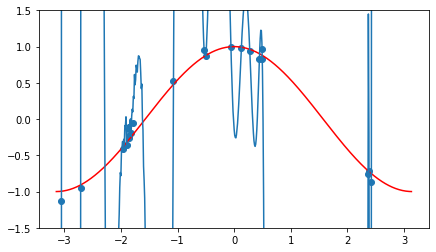

In [35]:
# カーネル回帰
def kernel_predict(X, x, alpha, beta):
    Y = 0
    for i in range(len(X)):
        Y += alpha[i] * kernel(X[i], x, beta)
    return Y

# 回帰によって結果を予測        
X_axis = np.arange(-3.14, 3.14, 0.01)
Y_predict = np.zeros(len(X_axis))
for i in range(len(X_axis)):
    Y_predict[i] = kernel_predict(X, X_axis[i], alpha, beta)

# 結果を描画
plt.figure(figsize=(7, 4))

## 観測データ
plt.scatter(data['x'].values, data['y'].values)
## 真の関数
plt.plot(X_axis, np.cos(X_axis), c='red')
## 予測した関数
plt.plot(X_axis, Y_predict)

plt.ylim((-1.5, 1.5))
plt.show()

In [10]:
X_axis

array([-3.14000000e+00, -3.13000000e+00, -3.12000000e+00, -3.11000000e+00,
       -3.10000000e+00, -3.09000000e+00, -3.08000000e+00, -3.07000000e+00,
       -3.06000000e+00, -3.05000000e+00, -3.04000000e+00, -3.03000000e+00,
       -3.02000000e+00, -3.01000000e+00, -3.00000000e+00, -2.99000000e+00,
       -2.98000000e+00, -2.97000000e+00, -2.96000000e+00, -2.95000000e+00,
       -2.94000000e+00, -2.93000000e+00, -2.92000000e+00, -2.91000000e+00,
       -2.90000000e+00, -2.89000000e+00, -2.88000000e+00, -2.87000000e+00,
       -2.86000000e+00, -2.85000000e+00, -2.84000000e+00, -2.83000000e+00,
       -2.82000000e+00, -2.81000000e+00, -2.80000000e+00, -2.79000000e+00,
       -2.78000000e+00, -2.77000000e+00, -2.76000000e+00, -2.75000000e+00,
       -2.74000000e+00, -2.73000000e+00, -2.72000000e+00, -2.71000000e+00,
       -2.70000000e+00, -2.69000000e+00, -2.68000000e+00, -2.67000000e+00,
       -2.66000000e+00, -2.65000000e+00, -2.64000000e+00, -2.63000000e+00,
       -2.62000000e+00, -

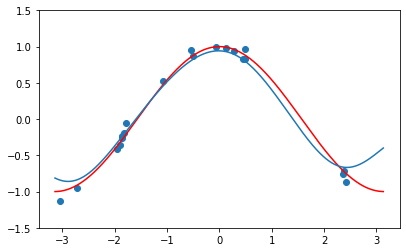

In [33]:
# 正則化項の係数
lam = 0.5
alpha_r = np.linalg.inv(K + lam * np.eye(K.shape[0])).dot(Y)

# 回帰によって結果を予測
Y_predict_r = np.zeros(len(X_axis))
for i in range(len(X_axis)):
    Y_predict_r[i] = kernel_predict(X, X_axis[i], alpha_r, beta)

# 結果を描画
plt.figure(figsize=(6.472, 4))

## 観測データ
plt.scatter(data['x'].values, data['y'].values)
## 真の関数
plt.plot(X_axis, np.cos(X_axis), c='red')
## 予測した関数
plt.plot(X_axis, Y_predict_r)

plt.ylim((-1.5, 1.5))
plt.show()